# REWMEM.Dep PST data Analysis

In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/'
path2figs = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/Figures/'

In [2]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize')) # Can use this to estimate Cohen's d
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) # This is helpful for extracting betas from hierarchical regresssions
%R suppressMessages(library('vcd')) # This is useful for getting effect sizes from chi-square tests

/Users/ebarrick/Work/Expts/Code


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'reshape2',
       'effsize', 'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='|S12')

In [3]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [35]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

In [36]:
sr = sr[sr.Eligible != 0]

In [6]:
# Figured I'd include the code to generate this since it's been updated since the last time you did this . . . 
# . . . next please run descriptive stats, generate some boxplots, and run b/w group t-tests on age, education, 
# gender (use a chi-square for that), and all the self-report measures.

In [37]:
print_full(sr)

Item,subject,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore
2,RMD003,MDD,43,F,W,NH,Separated,technical college,12.0,chef,NaN,NaN,NaN,1,18,13.00,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
3,RMD004,HC,37,M,W,NH,Never Married,four year college,16.0,Accountant,BS,10-25k,NaN,1,2,13.00,12,15,18,13,12,17,12,42,21,23,23,1,1,0,0,0,0,0,0,1,63,29,59,85,86,95,38,valid,14,47,44,48,49,0,0,0,15,3,2,-10,yes,105
4,RMD005,HC,27,M,W,H,Never Married,graduate or professional school,17.0,Student,MA,<10K,NaN,1,3,13.00,9,11,17,17,12,17,17,40,25,27,31,0,0,1,0,0,0,1,0,2,63,43,68,70,83,85,32,valid,27,45,38,47,42,3,2,1,11,1,4,0,yes,121
5,RMD006,HC,43,M,W,NH,Married or living with someone as if married,four year college,16.0,lab manager,BS,75-100K,NaN,1,0,12.50,11,10,18,18,11,17,12,36,18,20,21,0,0,1,0,0,0,0,0,1,54,43,72,78,78,74,44,valid,26,42,35,45,49,0,0,0,15,0,3,-12,yes,114
6,RMD007,HC,20,F,W,NH,Never Married,some college,14.0,student,NaN,>100K,NaN,1,3,13.00,10,9,16,20,18,17,23,53,27,32,38,0,0,1,2,1,0,1,0,5,40,63,77,73,69,76,37,valid,27,39,37,47,38,3,3,1,9,6,6,10,yes,125
7,RMD009,HC,46,M,W,NH,never married,four year college,16.0,self employed,BS,25-50K,NaN,1,0,13.00,16,13,19,20,12,18,14,51,27,28,35,3,0,1,2,0,0,1,0,4,59,45,81,89,85,83,53,valid,24,45,30,41,51,3,1,1,14,2,3,-4,yes,105
8,RMD010,HC,55,F,W,NH,Never Married,graduate or professional school,16.0,volunteer coordinator,MA,50-75K,NaN,1,0,13.00,9,13,16,20,11,18,12,41,20,20,22,1,2,2,1,0,1,1,0,7,43,51,88,74,94,90,34,valid,17,43,32,48,49,0,3,3,10,5,3,4,yes,122
9,RMD011,HC,24,F,W,NH,never married,graduate or professional school,17.0,medical journalist,MS,10-25K,NaN,1,6,13.00,13,15,19,25,16,27,22,68,29,25,35,0,0,2,3,1,0,2,0,8,69,63,74,84,77,76,57,valid,33,40,45,42,45,4,3,8,9,6,2,14,yes,125
10,RMD012,HC,37,F,Af,NH,never married,graduate or professional school,19.0,student,MA,<10K,NaN,1,0,13.00,15,14,20,14,11,19,12,35,18,20,22,0,0,1,1,0,0,0,0,2,44,26,83,89,95,89,62,valid,14,50,38,57,58,0,0,1,18,0,3,-14,yes,98
11,RMD013,MDD,46,M,W,NH,never married,four year college,16.0,museum educator,BA,50-75K,NaN,1,22,13.00,11,12,13,14,18,25,36,93,52,45,52,2,0,2,NaN,1,0,1,0,NaN,61,64,58,51,59,65,23,valid,40,28,30,39,32,5,8,7,3,10,4,31,yes,125


### *Demographics*

Group       
HC     count    41.000000
       mean     29.853659
       std       8.670528
       min      20.000000
       25%      24.000000
       50%      27.000000
       75%      37.000000
       max      55.000000
MDD    count    37.000000
       mean     30.540541
       std      12.471288
       min      18.000000
       25%      21.000000
       50%      27.000000
       75%      34.000000
       max      64.000000
dtype: float64
Between-group t-tests on Age
t(76) = -0.28, p = 0.777


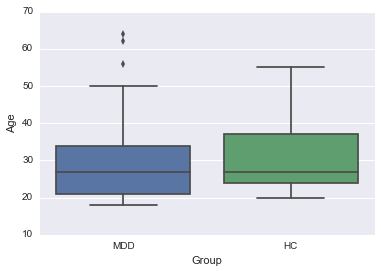

In [38]:
print (sr.groupby('Group')['Age'].describe())

print ('Between-group t-tests on Age')
misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])

sns.boxplot(y='Age', x='Group', data = sr)

Group       
HC     count    41.000000
       mean     16.743902
       std       2.239202
       min      12.000000
       25%      16.000000
       50%      16.000000
       75%      18.000000
       max      22.000000
MDD    count    37.000000
       mean     15.932432
       std       2.925373
       min      12.000000
       25%      14.000000
       50%      16.000000
       75%      17.000000
       max      25.000000
dtype: float64
Between-group t-tests on Education
t(76) = 1.38, p = 0.171


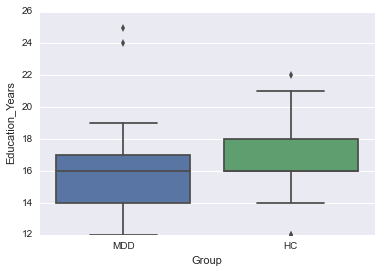

In [39]:
print (sr.groupby('Group')['Education_Years'].describe())

print ('Between-group t-tests on Education')
misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])

sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group       
HC     count    41.000000
       mean      1.365854
       std       2.405786
       min       0.000000
       25%       0.000000
       50%       0.000000
       75%       2.000000
       max      12.000000
MDD    count    37.000000
       mean     28.243243
       std       8.162943
       min      16.000000
       25%      22.000000
       50%      28.000000
       75%      35.000000
       max      47.000000
dtype: float64
Between-group t-tests on BDI
t(76) = -20.15, p = 0.000


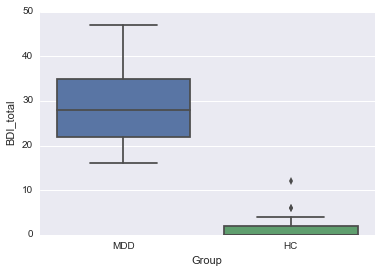

In [40]:
print (sr.groupby('Group')['BDI_total'].describe())

print ('Between-group t-tests on BDI')
misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-tests on BIS
t(76) = -6.08, p = 0.000
Between-group t-tests on BAS_D
t(76) = 3.21, p = 0.002
Between-group t-tests on BAS_FS
t(76) = 3.62, p = 0.001
Between-group t-tests on BAS_RR
t(76) = 1.56, p = 0.123


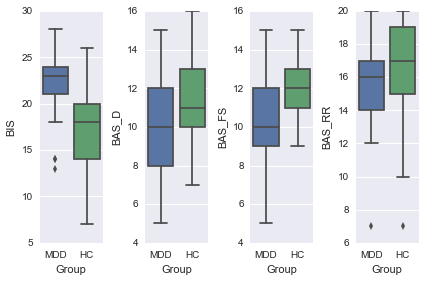

In [41]:
print ('Between-group t-tests on BIS')
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print ('Between-group t-tests on BAS_D')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print ('Between-group t-tests on BAS_FS')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print ('Between-group t-tests on BAS_RR')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


fig = plt.figure()
bis = fig.add_subplot(141)
sns.boxplot(y='BIS', x='Group', data = sr)
bis = fig.add_subplot(142)
sns.boxplot(y='BAS_D', x='Group', data = sr)
bas_fs = fig.add_subplot(143)
sns.boxplot(y='BAS_FS', x='Group', data = sr)
bas_rr = fig.add_subplot(144)
sns.boxplot(y='BAS_RR', x='Group', data = sr)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_GDA
t(76) = -9.07, p = 0.000
Between-group t-tests on MASQ_AA
t(76) = -5.22, p = 0.000
Between-group t-tests on MASQ_GDD
t(76) = -15.90, p = 0.000
Between-group t-tests on MASQ_AD
t(76) = -17.61, p = 0.000


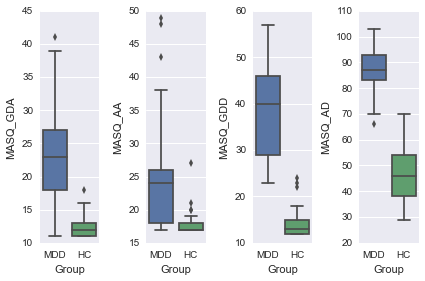

In [42]:
print ('Between-group t-tests on MASQ_GDA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])
print ('Between-group t-tests on MASQ_AA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print ('Between-group t-tests on MASQ_GDD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print ('Between-group t-tests on MASQ_AD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])

fig = plt.figure()
gda = fig.add_subplot(141)
sns.boxplot(y='MASQ_GDA', x='Group', data = sr)
aa = fig.add_subplot(142)
sns.boxplot(y='MASQ_AA', x='Group', data = sr)
gdd = fig.add_subplot(143)
sns.boxplot(y='MASQ_GDD', x='Group', data = sr)
ad = fig.add_subplot(144)
sns.boxplot(y='MASQ_AD', x='Group', data = sr)
fig.tight_layout()

### *AES*

Between-group t-tests on AES
t(76) = -15.99, p = 0.000


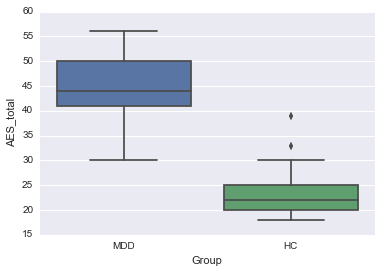

In [43]:
print ('Between-group t-tests on AES')
misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Between-group t-tests on STAI trait
t(76) = -11.53, p = 0.000
Between-group t-tests on STAI state
t(76) = -18.06, p = 0.000


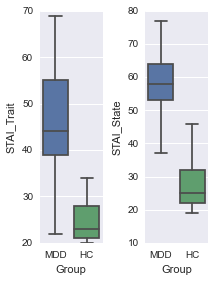

In [44]:
print ('Between-group t-tests on STAI trait')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])
print ('Between-group t-tests on STAI state')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='STAI_Trait', x='Group', data = sr)
state = fig.add_subplot(142)
sns.boxplot(y='STAI_State', x='Group', data = sr)
fig.tight_layout()

### *SHAPS*

Between-group t-tests on SHAPS
t(76) = -9.45, p = 0.000


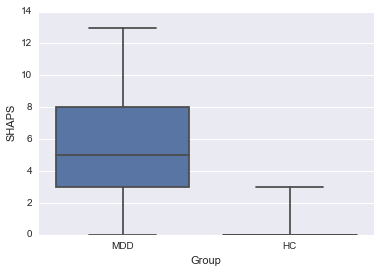

In [45]:
print ('Between-group t-tests on SHAPS')
misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])

sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

Between-group t-tests on PSQI duration
t(76) = -1.98, p = 0.051
Between-group t-tests on PSQI Distubance
t(76) = -2.44, p = 0.017
Between-group t-tests on PSQI Latency
t(76) = nan, p = nan
Between-group t-tests on PSQI Daytime Disturbance
t(76) = -13.66, p = 0.000
Between-group t-tests on PSQI Efficiency
t(76) = -2.22, p = 0.029
Between-group t-tests on PSQI Quality
t(76) = nan, p = nan
Between-group t-tests on PSQI Medication
t(76) = -0.84, p = 0.404
Between-group t-tests on PSQI Total
t(76) = nan, p = nan


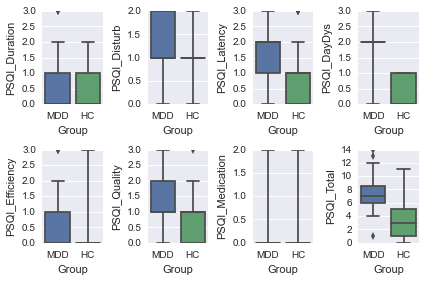

In [46]:
# Check on nan t-tests (prob have missing values)

print ('Between-group t-tests on PSQI duration')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print ('Between-group t-tests on PSQI Distubance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print ('Between-group t-tests on PSQI Latency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print ('Between-group t-tests on PSQI Daytime Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print ('Between-group t-tests on PSQI Efficiency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print ('Between-group t-tests on PSQI Quality')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print ('Between-group t-tests on PSQI Medication')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print ('Between-group t-tests on PSQI Total')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])
fig = plt.figure()
dur = fig.add_subplot(241)
sns.boxplot(y='PSQI_Duration', x='Group', data = sr)
dist = fig.add_subplot(242)
sns.boxplot(y='PSQI_Disturb', x='Group', data = sr)
lat = fig.add_subplot(243)
sns.boxplot(y='PSQI_Latency', x='Group', data = sr)
day = fig.add_subplot(244)
sns.boxplot(y='PSQI_DayDys', x='Group', data = sr)
eff = fig.add_subplot(245)
sns.boxplot(y='PSQI_Efficiency', x='Group', data = sr)
qual = fig.add_subplot(246)
sns.boxplot(y='PSQI_Quality', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='PSQI_Medication', x='Group', data = sr)
tot = fig.add_subplot(248)
sns.boxplot(y='PSQI_Total', x='Group', data = sr)                                                                                                                                               
fig.tight_layout()

### *TCI*

In [47]:
sr.subject.nunique()

78

In [48]:
#RMD060 and RMD062 == invalid
sr.TCI_Valid.value_counts()

valid    78
dtype: int64

Between-group t-tests on Novelty Seeking
t(76) = -1.35, p = 0.181
Between-group t-tests on Harm avoidance
t(76) = -9.92, p = 0.000
Between-group t-tests on Reward dependence
t(76) = 2.74, p = 0.008
Between-group t-tests on Persistence
t(76) = 8.03, p = 0.000
Between-group t-tests on Self-Directedness 
t(76) = 11.19, p = 0.000
Between-group t-tests on Cooperativeness
t(76) = 3.39, p = 0.001
Between-group t-tests on Self Transcendence
t(76) = 1.17, p = 0.245


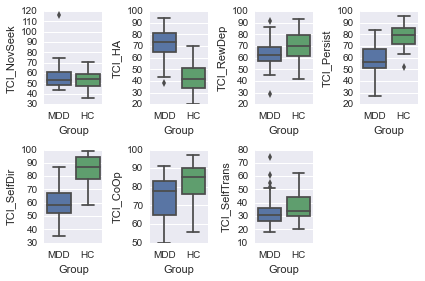

In [49]:
print ('Between-group t-tests on Novelty Seeking')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print ('Between-group t-tests on Harm avoidance')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print ('Between-group t-tests on Reward dependence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print ('Between-group t-tests on Persistence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print ('Between-group t-tests on Self-Directedness ')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print ('Between-group t-tests on Cooperativeness')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print ('Between-group t-tests on Self Transcendence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr)                                                                                                                                              
fig.tight_layout()

### *NEO*

Between-group t-tests on Neuroticism
t(76) = -16.35, p = 0.000
Between-group t-tests on Exraversion
t(76) = 9.90, p = 0.000
Between-group t-tests on Openness to Experience
t(76) = 0.71, p = 0.481
Between-group t-tests on Agreeableness
t(76) = 2.88, p = 0.005
Between-group t-tests on Conscientiousness
t(76) = 8.06, p = 0.000


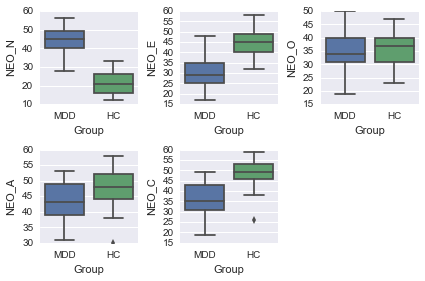

In [50]:
print ('Between-group t-tests on Neuroticism')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print ('Between-group t-tests on Exraversion')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print ('Between-group t-tests on Openness to Experience')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print ('Between-group t-tests on Agreeableness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print ('Between-group t-tests on Conscientiousness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

### *POMS*

Between-group t-tests on Tension-Anxiety
t(76) = -10.09, p = 0.000
Between-group t-tests on Depression
t(76) = -15.79, p = 0.000
Between-group t-tests on Anger-Hostility
t(76) = -6.29, p = 0.000
Between-group t-tests on Vigor-Activity
t(76) = 12.68, p = 0.000
Between-group t-tests on Fatigue
t(76) = -14.52, p = 0.000
Between-group t-tests on Confusion-Bewilderment
t(76) = -3.77, p = 0.000
Between-group t-tests on Total Mood Disturbance
t(76) = -16.39, p = 0.000


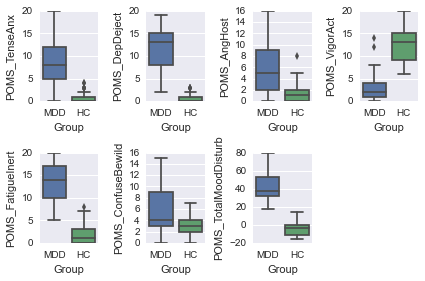

In [51]:
print ('Between-group t-tests on Tension-Anxiety')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])
print ('Between-group t-tests on Depression')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])
print ('Between-group t-tests on Anger-Hostility')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])
print ('Between-group t-tests on Vigor-Activity')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])
print ('Between-group t-tests on Fatigue')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],sr[sr.Group == 'MDD']['POMS_FatigueInert'])
print ('Between-group t-tests on Confusion-Bewilderment')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],sr[sr.Group == 'MDD']['POMS_ConfuseBewild'])
print ('Between-group t-tests on Total Mood Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],sr[sr.Group == 'MDD']['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

Between-group t-tests on WTAR
t(76) = 0.14, p = 0.890


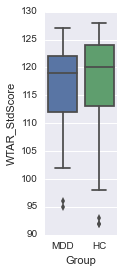

In [52]:
# Figure out why nan for t-test
print ('Between-group t-tests on WTAR')
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='WTAR_StdScore', x='Group', data = sr)

# PST Train

In [53]:
# Assemble the PST training data

%cd {path2data}

e_dfs = []
ef_d = re.compile('fMRI_train')

subjects = !ls -d RMD0*

for subject in subjects:
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            ef_m = ef_d.search(filename)
            if ef_m:
                file_path = curr_path + filename
                e_df = pd.read_csv(file_path)
                e_df['subject'] = subject
                e_dfs.append(e_df)
                
train_data = pd.concat(e_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy','left_stim','left_stim_number',
               'right_stim','right_stim_number','object_onset','object_duration','response','response_onset',
                'isi_onset','isi_duration','scheduled_outcome','feedback','feedback_onset','feedback_duration',
               'iti_onset','iti_duration']


/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [54]:
train_data['group'].replace('NaN', 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [82]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [74]:
"""Looking for outliers and missed reponses. Looks like there were a significant amount of missed reponses for the 
training."""

dfs = []
for sub in train_full.subject.unique():
    outlier = []
    df = train_full[train_full.subject == sub]
    for i, row_i in df.iterrows():
        if np.isnan(row_i.trial_RT):
            outlier.append(np.nan)
        elif abs(row_i.trial_RT-df.trial_RT.mean()) <= df.trial_RT.std()*3:
            outlier.append(0)
        else:
            outlier.append(1)
    df['outlier'] = outlier
    dfs.append(df)
train = pd.concat(dfs)

print ("Number of trials that are not (0) outliers vs. are (1) outliers:")
print (train.outlier.value_counts())

# Count number of trials with no response, drop them, and drop outliers.
print "Number of trials with no response: " + str(len(train[train.trial_RT == 999])) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials that are not (0) outliers vs. are (1) outliers:
0    18295
1      325
dtype: int64
Number of trials with no response: 597


In [83]:
train_clean.head()

,subject,group,trial_num,block,trial_RT,lnRT,accuracy,left_stim,left_stim_number,right_stim,right_stim_number,object_onset,object_duration,response,response_onset,isi_onset,isi_duration,scheduled_outcome,feedback,feedback_onset,feedback_duration,iti_onset,iti_duration,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore,outlier
0,RMD003,MDD,1,1,1.467,0.383219,0,Stimuli/1.bmp,2,Stimuli/5.bmp,5,14.970,3,right,16.437,17.970,4.984,0,reward,22.954,1.000,23.954,0.517,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0
1,RMD003,MDD,2,1,1.134,0.125751,0,Stimuli/4.bmp,3,Stimuli/2.bmp,4,24.471,3,right,25.605,27.471,0.500,1,zero,27.971,1.000,28.970,0.500,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0
2,RMD003,MDD,3,1,0.917,-0.086648,1,Stimuli/6.bmp,1,Stimuli/3.bmp,6,29.471,3,left,30.388,32.471,0.500,1,reward,32.971,0.983,33.954,4.017,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0
3,RMD003,MDD,4,1,1.200,0.182322,0,Stimuli/6.bmp,1,Stimuli/3.bmp,6,37.972,3,right,39.172,40.971,0.500,1,zero,41.471,0.983,42.455,2.017,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0
4,RMD003,MDD,5,1,1.500,0.405465,0,Stimuli/5.bmp,5,Stimuli/1.bmp,2,44.472,3,left,45.973,47.472,1.000,1,zero,48.472,0.983,49.455,0.517,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0


In [112]:
#Which participants have > 10% of trials as no response?


# PST Test

In [76]:
# Assemble the PST test data

%cd {path2data}

e_dfs = []
ef_d = re.compile('PST_test')

subjects = !ls -d RMD0*

for subject in subjects:
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            ef_m = ef_d.search(filename)
            if ef_m:
                file_path = curr_path + filename
                e_df = pd.read_csv(file_path)
                e_df['subject'] = subject
                e_dfs.append(e_df)
                
test_data = pd.concat(e_dfs)
test_columns = ['subject','group','block_id','trial_id','trial_RT','trial_accuracy','left_stim_name',
                'left_stim_number','right_stim_name','right_stim_number','response']

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [77]:
test_data['group'].replace('0', 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [80]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')
test_full.head()

,subject,group,block_id,trial_id,trial_RT,trial_accuracy,left_stim_name,left_stim_number,right_stim_name,right_stim_number,response,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore
0,RMD003,MDD,1,1,1.394,0,Stimuli/6.bmp,1,Stimuli/1.bmp,2,right,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
1,RMD003,MDD,1,2,1.996,1,Stimuli/5.bmp,5,Stimuli/2.bmp,4,right,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
2,RMD003,MDD,1,3,1.247,1,Stimuli/4.bmp,3,Stimuli/3.bmp,6,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
3,RMD003,MDD,1,4,1.195,1,Stimuli/4.bmp,3,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
4,RMD003,MDD,1,5,1.414,0,Stimuli/3.bmp,6,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96


In [81]:
dfs = []
for sub in test_full.subject.unique():
    outlier = []
    df = test_full[test_full.subject == sub]
    for i, row_i in df.iterrows():
        if np.isnan(row_i.trial_RT):
            outlier.append(np.nan)
        elif abs(row_i.trial_RT-df.trial_RT.mean()) <= df.trial_RT.std()*3:
            outlier.append(0)
        else:
            outlier.append(1)
    df['outlier'] = outlier
    dfs.append(df)
test = pd.concat(dfs)

print ("Number of trials that are not (0) outliers vs. are (1) outliers:")
print (test.outlier.value_counts())

# Count number of trials with no response, drop them, and drop outliers.
print "Number of trials with no response: " + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials that are not (0) outliers vs. are (1) outliers:
0    13521
1      159
dtype: int64
Number of trials with no response: 44
